# PHÂN CỤM ĐIỆN THOẠI VÀ LAPTOP TIKI

## 1.THU THẬP DỮ LIỆU

### 1.1 Merger data to raw_data.csv

In [1]:
import pandas as pd
import os  
import seaborn as sns
import matplotlib.pyplot as plt


thu_muc = 'raw_data'

csv1 = pd.read_csv(os.path.join(thu_muc, 'laptop_data_ncds.csv'))
csv2 = pd.read_csv(os.path.join(thu_muc, 'mobile_data_ncds.csv'))

du_lieu_hop_nhat = pd.concat([csv1, csv2], ignore_index=True)
du_lieu_hop_nhat.to_csv(os.path.join(thu_muc, 'raw_data.csv'), index=False, encoding='utf-8-sig')


In [2]:
data = pd.read_csv('./raw_data/raw_data.csv')
data.head(5)

,id,sku,short_description,price,list_price,discount,discount_rate,rating_average,review_count,quantity_sold,inventory_status,stock_item_qty,stock_item_max_sale_qty,product_name,brand_id,brand_name
0,274643985,5870061941518,ASUS ExpertBook B1400 được thiết kế dành cho d...,17190000,22100000,4910000,22,0.0,0,NaN,available,1000.0,1000.0,Máy vi tính Laptop Asus ExpertBook B1400 (Chip...,17826,Asus
1,106318753,9403513241479,Thiết kế sang trọngLaptop Dell Latitude 3420 L...,14590000,19900000,5310000,27,5.0,1,2.0,available,1000.0,1000.0,Máy tính xách tay Laptop Dell Latitude 3420 (I...,18805,Dell
2,183743642,9808599804519,Đặc điểm nổi bật Laptop Cũ Lenovo ThinkPad L46...,4562500,6250000,1687500,27,4.6,8,24.0,available,1000.0,1000.0,"Lenovo ThinkPad L460 (Intel Core i5 6300 , RAM...",18604,Lenovo
3,273716533,7358286623584,Primed to perform. Configured for your busines...,14490000,18890000,4400000,23,0.0,0,NaN,available,1000.0,1000.0,Laptop Asus Expertbook B1502CBA B1502 (Intel C...,17826,Asus
4,273949286,7246814409532,"ExpertBook B1 (B1502, 13th Gen Intel) Được sin...",16490000,22900000,6410000,28,0.0,0,NaN,available,1000.0,1000.0,Laptop Asus Expertbook B1502 - B1502CV (Intel ...,17826,Asus


### 1.2 Thống kê mô tả trực quan về dữ liệu đơn biến

#### Thống kê giá trị null

In [3]:
data.isnull().sum() 

id                           0
sku                          0
short_description            0
price                        0
list_price                   0
discount                     0
discount_rate                0
rating_average               0
review_count                 0
quantity_sold              756
inventory_status             0
stock_item_qty               2
stock_item_max_sale_qty      2
product_name                 0
brand_id                     0
brand_name                   0
dtype: int64

##### Hiển thị thông tin cơ bản về Crawl data


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1033 entries, 0 to 1032
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       1033 non-null   int64  
 1   sku                      1033 non-null   int64  
 2   short_description        1033 non-null   object 
 3   price                    1033 non-null   int64  
 4   list_price               1033 non-null   int64  
 5   discount                 1033 non-null   int64  
 6   discount_rate            1033 non-null   int64  
 7   rating_average           1033 non-null   float64
 8   review_count             1033 non-null   int64  
 9   quantity_sold            277 non-null    float64
 10  inventory_status         1033 non-null   object 
 11  stock_item_qty           1031 non-null   float64
 12  stock_item_max_sale_qty  1031 non-null   float64
 13  product_name             1033 non-null   object 
 14  brand_id                

### Mô tả các cột price, list_price, discount, discount_rate, rating_average, review_count, quantity_sold


In [5]:
price_description = data[['price', 'list_price', 'discount', 'discount_rate', 'rating_average', 'review_count', 'quantity_sold']].describe()
price_description

,price,list_price,discount,discount_rate,rating_average,review_count,quantity_sold
count,1.033000e+03,1.033000e+03,1.033000e+03,1033.000000,1033.000000,1033.000000,277.000000
mean,1.624718e+07,1.701472e+07,7.675344e+05,5.591481,0.892643,9.637948,199.978339
std,1.172026e+07,1.186629e+07,1.839999e+06,10.169951,1.877412,122.562856,1166.810098
min,1.100000e+05,1.100000e+05,0.000000e+00,0.000000,0.000000,0.000000,1.000000
25%,6.190000e+06,6.690000e+06,0.000000e+00,0.000000,0.000000,0.000000,1.000000
50%,1.549000e+07,1.674000e+07,0.000000e+00,0.000000,0.000000,0.000000,3.000000
75%,2.200000e+07,2.290000e+07,4.000000e+05,7.000000,0.000000,0.000000,17.000000
max,8.299000e+07,8.299000e+07,1.276100e+07,50.000000,5.000000,2989.000000,13979.000000


#### Cột price

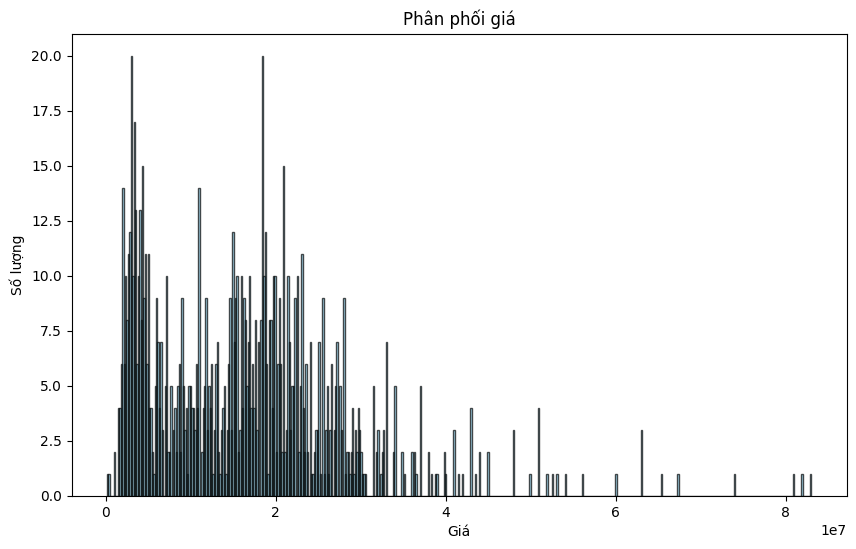

Kết luận:
Giá cao nhất của sản phẩm: 82,990,000 VNĐ
Giá thấp nhất của sản phẩm: 110,000 VNĐ
Sự biến động giá cả của sản phẩm là cao.
Biến động cao nhất của giá sản phẩm là: 82,880,000 VNĐ


In [6]:

plt.figure(figsize=(10, 6))
plt.hist(data['price'], bins=500, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Phân phối giá')
plt.xlabel('Giá')
plt.ylabel('Số lượng')
plt.show()


print("Kết luận:")
price_fluctuation = "cao" if data['price'].std() > 0.1 * data['price'].mean() else "thấp"

max_price = data['price'].max()
min_price = data['price'].min()
formatted_max_price = "{:,.0f}".format(max_price)
formatted_min_price = "{:,.0f}".format(min_price)

print(f"Giá cao nhất của sản phẩm: {formatted_max_price} VNĐ")
print(f"Giá thấp nhất của sản phẩm: {formatted_min_price} VNĐ")

print(f"Sự biến động giá cả của sản phẩm là {price_fluctuation}.")

price_std = max_price-min_price
formatted_price_std = "{:,.0f}".format(price_std)
print(f"Biến động cao nhất của giá sản phẩm là: {formatted_price_std} VNĐ")


#### Trực quan cột quantity_sold

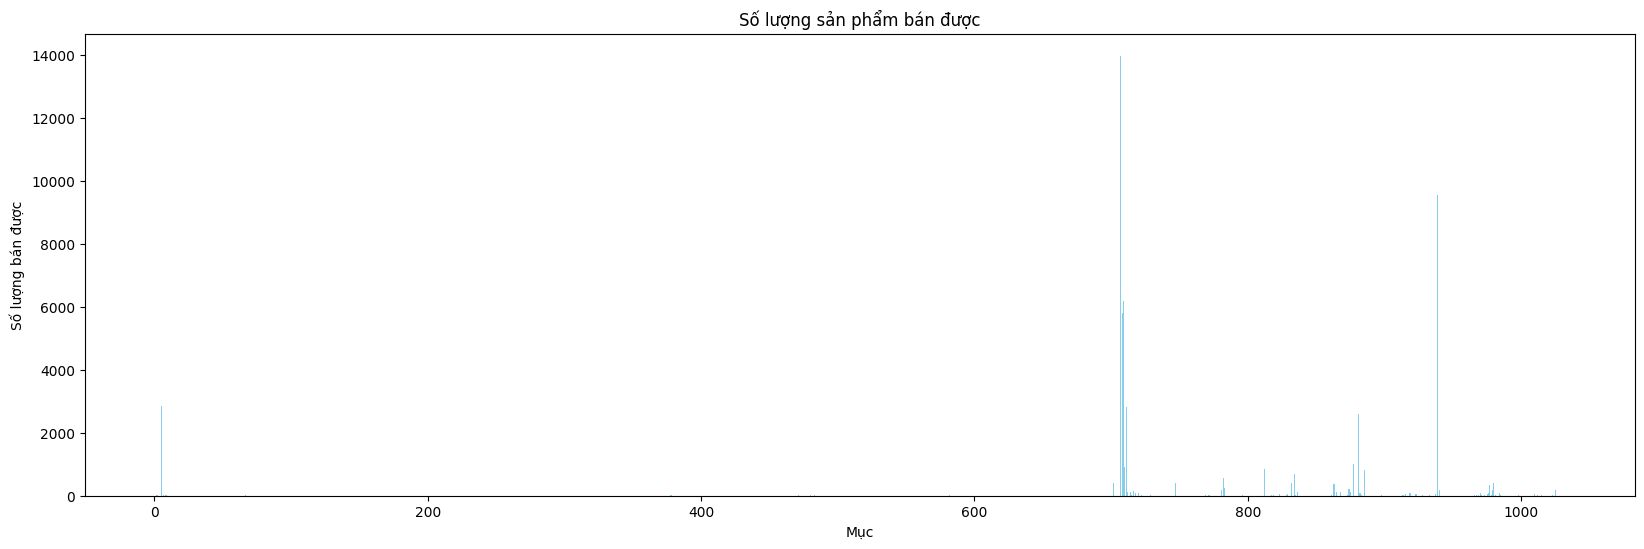

Kết luận:
Số lượng sản phẩm được bán trung bình: 200
Số lượng sản phẩm được bán cao nhất: 13979
Số lượng sản phẩm được bán thấp nhất: 1
Số lượng sản phẩm được bán trung vị: 3
Độ biến động của số lượng sản phẩm được bán (độ lệch chuẩn): 1167


In [7]:


plt.figure(figsize=(20, 6))
plt.bar(data.index, data['quantity_sold'], color='skyblue')
plt.title('Số lượng sản phẩm bán được')
plt.xlabel('Mục')
plt.ylabel('Số lượng bán được')
plt.show()

print("Kết luận:")
average_quantity_sold = data['quantity_sold'].mean()
max_quantity_sold = data['quantity_sold'].max()
min_quantity_sold = data['quantity_sold'].min()

print(f"Số lượng sản phẩm được bán trung bình: {average_quantity_sold:.0f}")
print(f"Số lượng sản phẩm được bán cao nhất: {max_quantity_sold:.0f}")
print(f"Số lượng sản phẩm được bán thấp nhất: {min_quantity_sold:.0f}")
print(f"Số lượng sản phẩm được bán trung vị: {data['quantity_sold'].median():.0f}")
print(f"Độ biến động của số lượng sản phẩm được bán (độ lệch chuẩn): {data['quantity_sold'].std():.0f}")


#### Brand_name

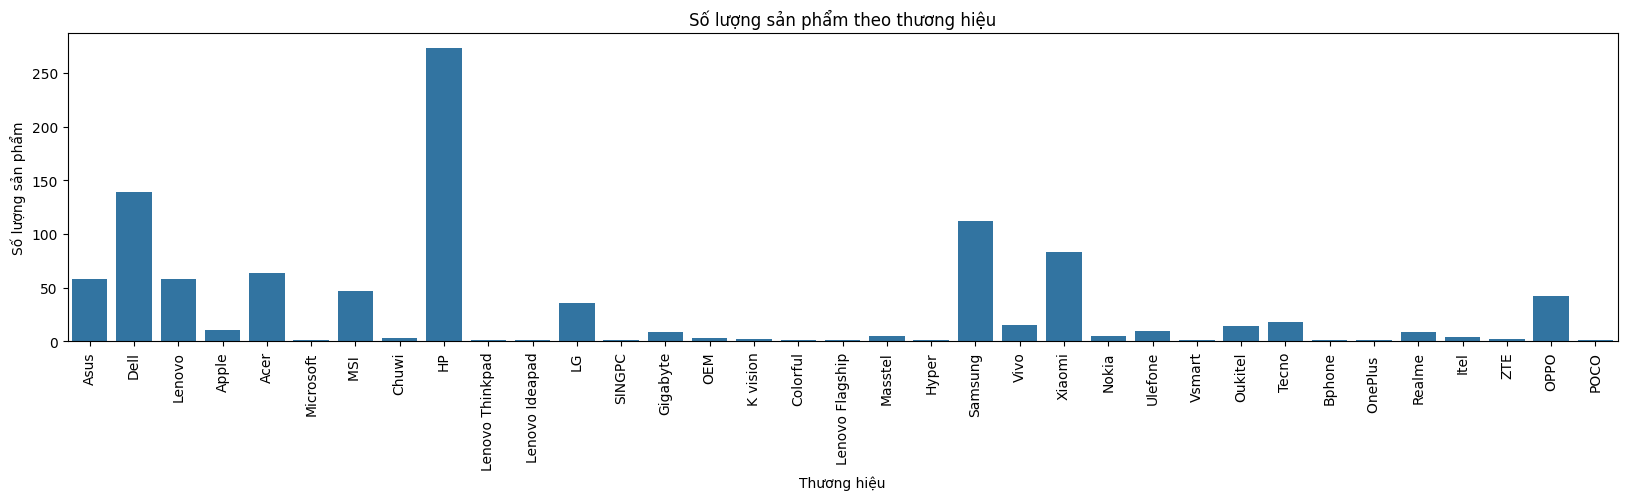

Top 5 thương hiệu có số lượng sản phẩm nhiều nhất:
brand_name
HP         273
Dell       139
Samsung    112
Xiaomi      83
Acer        64
Name: count, dtype: int64

Thương hiệu có số lượng sản phẩm ít nhất:
brand_name
POCO    1
Name: count, dtype: int64

Tổng số lượng sản phẩm: 1033


In [8]:

plt.figure(figsize=(20, 4))
sns.countplot(data=data, x='brand_name')
plt.title('Số lượng sản phẩm theo thương hiệu')
plt.xlabel('Thương hiệu')
plt.ylabel('Số lượng sản phẩm')
plt.xticks(rotation=90) 
plt.show()

product_counts = data['brand_name'].value_counts()

top_5_brands = product_counts.head(5)
print("Top 5 thương hiệu có số lượng sản phẩm nhiều nhất:")
print(top_5_brands)

print("\nThương hiệu có số lượng sản phẩm ít nhất:")
print(product_counts.tail(1))

total_products = data['brand_name'].count()
print("\nTổng số lượng sản phẩm:", total_products)


#### discount

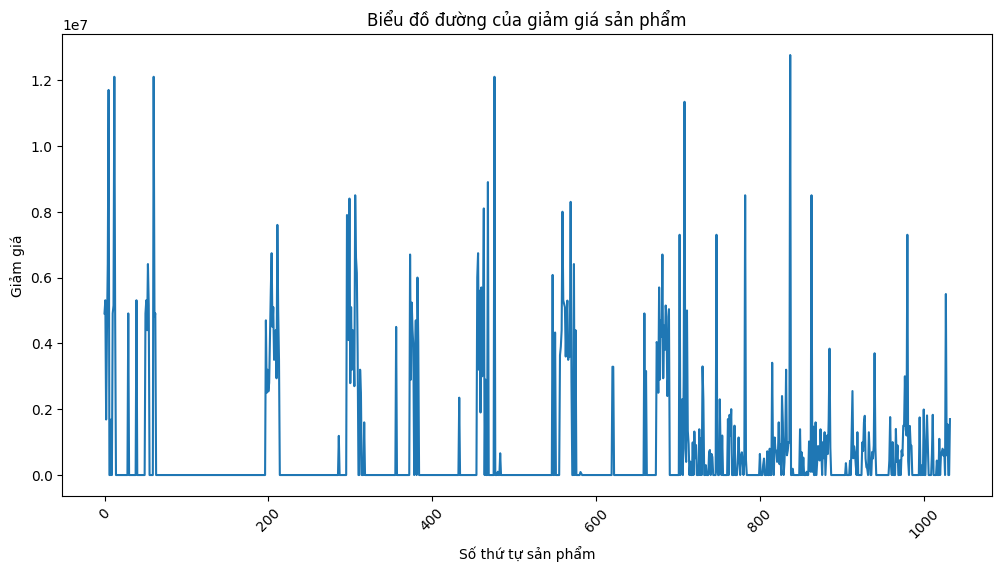

Kết luận:
Giảm giá cao nhất của sản phẩm: 12,761,000 VNĐ
Sự biến động giảm giá của sản phẩm là cao.
Giảm giá trung bình của sản phẩm: 767,534 VNĐ


In [9]:
plt.figure(figsize=(12, 6))

sns.lineplot(data=data, x=data.index, y='discount')
plt.title('Biểu đồ đường của giảm giá sản phẩm')
plt.xlabel('Số thứ tự sản phẩm')
plt.ylabel('Giảm giá')
plt.xticks(rotation=45)
plt.show()

print("Kết luận:")
discount_fluctuation = "cao" if data['discount'].std() > 0.1 * data['discount'].mean() else "thấp"

max_discount = data['discount'].max()
min_discount = data['discount'].min()
formatted_max_discount = "{:,.0f}".format(max_discount)

print(f"Giảm giá cao nhất của sản phẩm: {formatted_max_discount} VNĐ")

print(f"Sự biến động giảm giá của sản phẩm là {discount_fluctuation}.")

average_discount = data['discount'].mean()
formatted_average_discount = "{:,.0f}".format(average_discount)
print(f"Giảm giá trung bình của sản phẩm: {formatted_average_discount} VNĐ")

#### review_count

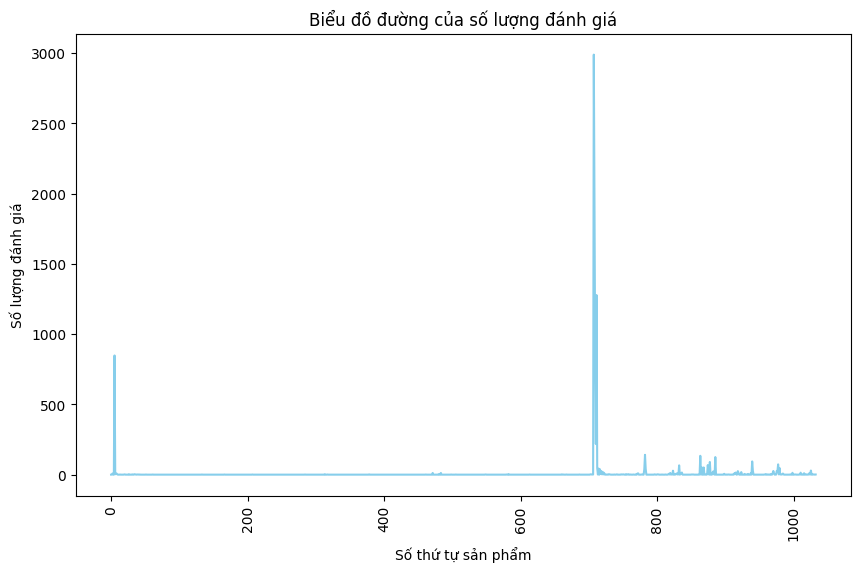

Kết luận:
Số lượng đánh giá trung bình: 9.637947725072603
Số lượng đánh giá cao nhất: 2989
Số lượng đánh giá thấp nhất: 0
Độ biến động của số lượng đánh giá (độ lệch chuẩn): 122.56285601622483


In [10]:

plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x=data.index, y='review_count', color='skyblue')
plt.title('Biểu đồ đường của số lượng đánh giá')
plt.xlabel('Số thứ tự sản phẩm')
plt.ylabel('Số lượng đánh giá')
plt.xticks(rotation=90)  
plt.show()

# Kết luận
print("Kết luận:")
average_review_count = data['review_count'].mean()
max_review_count = data['review_count'].max()
min_review_count = data['review_count'].min()
std_review_count = data['review_count'].std()

print("Số lượng đánh giá trung bình:", average_review_count)
print("Số lượng đánh giá cao nhất:", max_review_count)
print("Số lượng đánh giá thấp nhất:", min_review_count)
print("Độ biến động của số lượng đánh giá (độ lệch chuẩn):", std_review_count)


#### rating_average

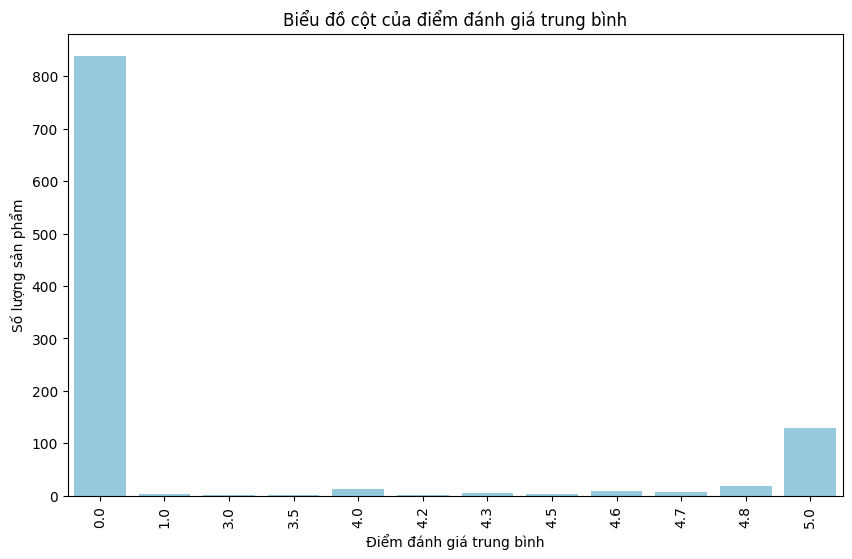

Kết luận:
Số lượng đánh giá trung bình: 0.8926427879961277
Điểm đánh giá cao nhất: 5.0
Điểm đánh giá thấp nhất: 0.0
Độ biến động của điểm đánh giá trung bình (độ lệch chuẩn): 1.8774116493598065
Số lượng sản phẩm có số lượng đánh giá cao hơn trung bình: 49
Số lượng sản phẩm có số lượng đánh giá thấp hơn trung bình: 984


In [11]:

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='rating_average', color='skyblue')
plt.title('Biểu đồ cột của điểm đánh giá trung bình')
plt.xlabel('Điểm đánh giá trung bình')
plt.ylabel('Số lượng sản phẩm')
plt.xticks(rotation=90)  
plt.show()

# Kết luận
print("Kết luận:")
average_rating_average = data['rating_average'].mean()
max_rating_average = data['rating_average'].max()
min_rating_average = data['rating_average'].min()
std_rating_average = data['rating_average'].std()
high_review_count_products = data[data['review_count'] > data['review_count'].mean()]
low_review_count_products = data[data['review_count'] < data['review_count'].mean()]

print("Số lượng đánh giá trung bình:", average_rating_average)
print("Điểm đánh giá cao nhất:", max_rating_average)
print("Điểm đánh giá thấp nhất:", min_rating_average)
print("Độ biến động của điểm đánh giá trung bình (độ lệch chuẩn):", std_rating_average)
print("Số lượng sản phẩm có số lượng đánh giá cao hơn trung bình:", high_review_count_products.shape[0])
print("Số lượng sản phẩm có số lượng đánh giá thấp hơn trung bình:", low_review_count_products.shape[0])


#### 

## 2. Tiền xử lý dữ liệu

### 2.1 Kiểm tra dữ liệu

In [12]:
import pandas as pd

thu_muc_raw = 'raw_data'
thu_muc_clean = 'clean_data'

raw_data = pd.read_csv(thu_muc_raw + '/raw_data.csv')
raw_data.to_csv(thu_muc_clean + '/clean_data.csv', encoding='utf-8-sig')
dt = pd.read_csv(thu_muc_clean + '/clean_data.csv')

print(raw_data.isnull().sum())


id                           0
sku                          0
short_description            0
price                        0
list_price                   0
discount                     0
discount_rate                0
rating_average               0
review_count                 0
quantity_sold              756
inventory_status             0
stock_item_qty               2
stock_item_max_sale_qty      2
product_name                 0
brand_id                     0
brand_name                   0
dtype: int64


In [13]:

num_duplicate_ids = raw_data.duplicated('id').sum()
print("Số lượng ID trùng nhau:", num_duplicate_ids)

num_duplicate_ids = dt.duplicated('sku').sum()
print("Số lượng sku trùng nhau:", num_duplicate_ids)




Số lượng ID trùng nhau: 29
Số lượng sku trùng nhau: 29


In [14]:
is_price_int = dt['price'].apply(lambda x: isinstance(x, int))
is_list_price_int = dt['list_price'].apply(lambda x: isinstance(x, int))
is_discount_rate_int = dt['discount_rate'].apply(lambda x: isinstance(x, int))
is_rating_average_float = dt['rating_average'].apply(lambda x: isinstance(x, float))
is_review_count_int = dt['review_count'].apply(lambda x: isinstance(x, int))
is_quantity_sold_int = dt['quantity_sold'].apply(lambda x: isinstance(x, int))

num_non_int_price = (~is_price_int).sum()
num_non_int_list_price = (~is_list_price_int).sum()
num_non_int_discount_rate = (~is_discount_rate_int).sum()
num_non_float_rating_average = (~is_rating_average_float).sum()
num_non_int_review_count = (~is_review_count_int).sum()
num_non_int_quantity_sold = (~is_quantity_sold_int).sum()

print("Số lượng giá trị không phải số nguyên trong cột 'price':", num_non_int_price)
print("Số lượng giá trị không phải số nguyên trong cột 'list_price':", num_non_int_list_price)
print("Số lượng giá trị không phải số nguyên trong cột 'discount_rate':", num_non_int_discount_rate)
print("Số lượng giá trị không phải số thực trong cột 'rating_average':", num_non_float_rating_average)
print("Số lượng giá trị không phải số nguyên trong cột 'review_count':", num_non_int_review_count)
print("Số lượng giá trị không phải số nguyên trong cột 'quantity_sold':", num_non_int_quantity_sold)


Số lượng giá trị không phải số nguyên trong cột 'price': 0
Số lượng giá trị không phải số nguyên trong cột 'list_price': 0
Số lượng giá trị không phải số nguyên trong cột 'discount_rate': 0
Số lượng giá trị không phải số thực trong cột 'rating_average': 0
Số lượng giá trị không phải số nguyên trong cột 'review_count': 0
Số lượng giá trị không phải số nguyên trong cột 'quantity_sold': 1033


#### 2.2 Clean data 

In [15]:
import pandas as pd

# Đọc dữ liệu từ tệp CSV
dt = pd.read_csv(thu_muc_clean + '/clean_data.csv')

# Tính toán giá trị trung bình của các cột
mean_quantity_sold = dt['quantity_sold'].mean()
mean_stock_item_qty = dt['stock_item_qty'].mean()
mean_stock_item_max_sale_qty = dt['stock_item_max_sale_qty'].mean()

# Làm tròn giá trị trung bình
mean_quantity_sold_rounded = round(mean_quantity_sold)
mean_stock_item_qty_rounded = round(mean_stock_item_qty)
mean_stock_item_max_sale_qty_rounded = round(mean_stock_item_max_sale_qty)

# Thay thế các giá trị NaN bằng giá trị trung bình đã được làm tròn
dt['quantity_sold'] = dt['quantity_sold'].fillna(mean_quantity_sold_rounded)
dt['stock_item_qty'] = dt['stock_item_qty'].fillna(mean_stock_item_qty_rounded)
dt['stock_item_max_sale_qty'] = dt['stock_item_max_sale_qty'].fillna(mean_stock_item_max_sale_qty_rounded)

# Chuyển cột 'quantity_sold' sang kiểu dữ liệu int
dt['quantity_sold'] = dt['quantity_sold'].astype(int)
dt['short_description'] = dt['short_description'].str.lstrip()
dt['product_name'] = dt['product_name'].str.lstrip()
dt['brand_name'] = dt['brand_name'].str.lstrip()


duplicates = dt.duplicated(subset=['id'], keep=False)

duplicate_rows = dt[duplicates]
if len(duplicate_rows) > 0:
    dt.drop_duplicates(subset=['id'], inplace=True)


duplicates = dt.duplicated(subset=['sku'], keep=False)

duplicate_rows = dt[duplicates]
if len(duplicate_rows) > 0:
    dt.drop_duplicates(subset=['sku'], inplace=True)    
print(dt.isnull().sum())

# Lưu dữ liệu đã được làm sạch vào một tệp CSV mới
dt.to_csv('clean_data/clean_data.csv', index=False,encoding='utf-8-sig')


Unnamed: 0                 0
id                         0
sku                        0
short_description          0
price                      0
list_price                 0
discount                   0
discount_rate              0
rating_average             0
review_count               0
quantity_sold              0
inventory_status           0
stock_item_qty             0
stock_item_max_sale_qty    0
product_name               0
brand_id                   0
brand_name                 0
dtype: int64


In [16]:

dt = pd.read_csv('clean_data/clean_data.csv', encoding='utf-8-sig')
dt.head(3)


,Unnamed: 0,id,sku,short_description,price,list_price,discount,discount_rate,rating_average,review_count,quantity_sold,inventory_status,stock_item_qty,stock_item_max_sale_qty,product_name,brand_id,brand_name
0,0,274643985,5870061941518,ASUS ExpertBook B1400 được thiết kế dành cho d...,17190000,22100000,4910000,22,0.0,0,200,available,1000.0,1000.0,Máy vi tính Laptop Asus ExpertBook B1400 (Chip...,17826,Asus
1,1,106318753,9403513241479,Thiết kế sang trọngLaptop Dell Latitude 3420 L...,14590000,19900000,5310000,27,5.0,1,2,available,1000.0,1000.0,Máy tính xách tay Laptop Dell Latitude 3420 (I...,18805,Dell
2,2,183743642,9808599804519,Đặc điểm nổi bật Laptop Cũ Lenovo ThinkPad L46...,4562500,6250000,1687500,27,4.6,8,24,available,1000.0,1000.0,"Lenovo ThinkPad L460 (Intel Core i5 6300 , RAM...",18604,Lenovo


### 2.3 So sánh sự thay đổi

In [17]:

raw_data = pd.read_csv('raw_data/raw_data.csv',encoding='utf-8-sig')
clean_data = pd.read_csv('clean_data/clean_data.csv',encoding='utf-8-sig')

# Chỉ chọn các cột quan tâm
raw_selected = raw_data[['price', 'discount', 'rating_average', 'review_count', 'quantity_sold']]
clean_selected = clean_data[['price', 'discount', 'rating_average', 'review_count', 'quantity_sold']]

# Tính toán giá trị trung bình và phương sai của các cột
raw_mean = raw_selected.mean()
clean_mean = clean_selected.mean()
raw_std = raw_selected.std()
clean_std = clean_selected.std()

# Tính độ lệch giữa dữ liệu gốc và dữ liệu sau khi làm sạch
mean_diff = clean_mean - raw_mean
std_diff = clean_std - raw_std

# Tạo DataFrame thể hiện sự thay đổi của các cột
comparison_df = pd.DataFrame({
    'Column': raw_mean.index,
    'Raw Mean': raw_mean.values,
    'Clean Mean': clean_mean.values,
    'Mean Difference': mean_diff.values,
    'Raw Std': raw_std.values,
    'Clean Std': clean_std.values,
    'Std Difference': std_diff.values
})


print(comparison_df)
print("\n")
print("kết luận")
# Truy cập và hiển thị con số thay đổi cụ thể
for index, row in comparison_df.iterrows():
    column_name = row['Column']
    mean_diff_rounded = round(row['Mean Difference'], 2)  # Làm tròn đến 2 chữ số thập phân
    std_diff_rounded = round(row['Std Difference'], 2)  # Làm tròn đến 2 chữ số thập phân
    
    # Thêm đơn vị nếu cần
    mean_diff_formatted = f"{mean_diff_rounded} VND" if column_name in ['price', 'discount'] else mean_diff_rounded
    std_diff_formatted = f"{std_diff_rounded} VND" if column_name in ['price', 'discount'] else std_diff_rounded
    
    print(f"Cột: {column_name}")
    print(f"Thay đổi trung bình: {mean_diff_formatted}")
    print(f"Thay đổi độ lệch chuẩn: {std_diff_formatted}")
    print("\n")

raw_brand_count = raw_data['brand_name'].nunique()
clean_brand_count = clean_data['brand_name'].nunique()

print("Số lượng thương hiệu trong dữ liệu gốc:", raw_brand_count)
print("Số lượng thương hiệu trong dữ liệu sau khi làm sạch:", clean_brand_count)

brand_change = clean_brand_count - raw_brand_count
if brand_change > 0:
    print(f"Số lượng thương hiệu đã tăng thêm {brand_change} so với dữ liệu gốc.")
elif brand_change < 0:
    print(f"Số lượng thương hiệu đã giảm đi {abs(brand_change)} so với dữ liệu gốc.")
else:
    print("Không có sự thay đổi về số lượng thương hiệu giữa dữ liệu gốc và dữ liệu sau khi làm sạch.")




           Column      Raw Mean    Clean Mean  Mean Difference       Raw Std  \
0           price  1.624718e+07  1.632691e+07     79728.880837  1.172026e+07   
1        discount  7.675344e+05  6.728840e+05    -94650.401781  1.839999e+06   
2  rating_average  8.926428e-01  8.461155e-01        -0.046527  1.877412e+00   
3    review_count  9.637948e+00  9.890438e+00         0.252491  1.225629e+02   
4   quantity_sold  1.999783e+02  2.028665e+02         2.888195  1.166810e+03   

      Clean Std  Std Difference  
0  1.181938e+07    99120.058138  
1  1.689199e+06  -150799.811310  
2  1.838069e+00       -0.039342  
3  1.243127e+02        1.749810  
4  6.114602e+02     -555.349887  


kết luận
Cột: price
Thay đổi trung bình: 79728.88 VND
Thay đổi độ lệch chuẩn: 99120.06 VND


Cột: discount
Thay đổi trung bình: -94650.4 VND
Thay đổi độ lệch chuẩn: -150799.81 VND


Cột: rating_average
Thay đổi trung bình: -0.05
Thay đổi độ lệch chuẩn: -0.04


Cột: review_count
Thay đổi trung bình: 0.25
Thay đổi

## 3. Mã hoá dữ liệu

In [18]:
print("Các tên của các cột:")
clean_data = pd.read_csv('clean_data/clean_data.csv')
for column in clean_data.columns:
    print(column)

Các tên của các cột:
Unnamed: 0
id
sku
short_description
price
list_price
discount
discount_rate
rating_average
review_count
quantity_sold
inventory_status
stock_item_qty
stock_item_max_sale_qty
product_name
brand_id
brand_name


### Mã hóa cột brand_name

In [19]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

clean_data = pd.read_csv('clean_data/clean_data.csv')

# Khởi tạo đối tượng LabelEncoder
label_encoder = LabelEncoder()

# Áp dụng label encoding vào cột brand_name
encoded_brand_vector = label_encoder.fit_transform(clean_data['brand_name'])

# Chuyển vector mã hóa thành mảng numpy
encoded_brand_array = np.array(encoded_brand_vector)

# In ra 10 dòng đầu tiên của mảng
print(encoded_brand_array[:10])


[ 2  6 13  2  2  1  6 13 13  2]


## 4. Trực quan hoá mối quan hệ đa biến

In [20]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# Khởi tạo đối tượng LabelEncoder
label_encoder = LabelEncoder()

# Áp dụng mã hóa nhãn vào cột 'brand_name'
encoded_brand = label_encoder.fit_transform(clean_data['brand_name'])

# Thêm cột thương hiệu đã mã hóa vào DataFrame
clean_data['encoded_brand'] = encoded_brand

# Chọn các cột cho việc phân cụm
X = clean_data[['encoded_brand', 'price']]

# Sử dụng KMeans để phân cụm dữ liệu
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

# Thêm cột 'cluster' vào dữ liệu đã làm sạch
clean_data['cluster'] = kmeans.labels_

# Hiển thị vài dòng đầu tiên của dữ liệu đã làm sạch với cột 'cluster'
print(clean_data.head())


   Unnamed: 0         id            sku  \
0           0  274643985  5870061941518   
1           1  106318753  9403513241479   
2           2  183743642  9808599804519   
3           3  273716533  7358286623584   
4           4  273949286  7246814409532   

                                   short_description     price  list_price  \
0  ASUS ExpertBook B1400 được thiết kế dành cho d...  17190000    22100000   
1  Thiết kế sang trọngLaptop Dell Latitude 3420 L...  14590000    19900000   
2  Đặc điểm nổi bật Laptop Cũ Lenovo ThinkPad L46...   4562500     6250000   
3  Primed to perform. Configured for your busines...  14490000    18890000   
4  ExpertBook B1 (B1502, 13th Gen Intel) Được sin...  16490000    22900000   

   discount  discount_rate  rating_average  review_count  quantity_sold  \
0   4910000             22             0.0             0            200   
1   5310000             27             5.0             1              2   
2   1687500             27             4.6     

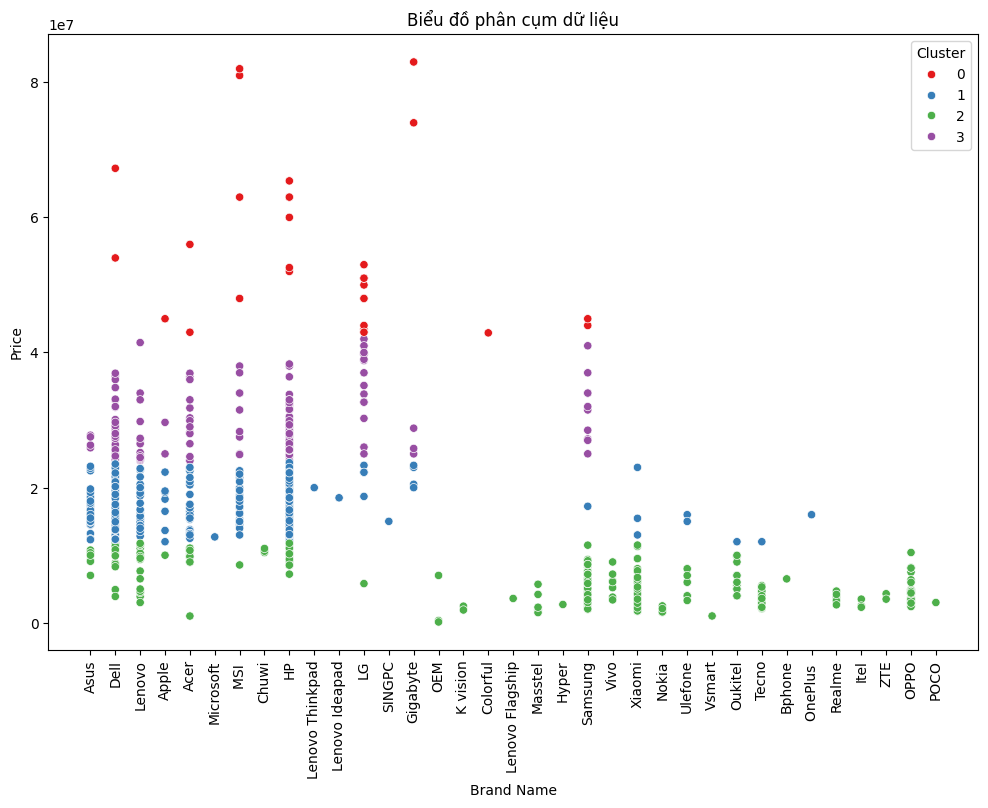

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
clean_data['cluster'] = kmeans.labels_
plt.figure(figsize=(12, 8))

sns.scatterplot(data=clean_data, x='brand_name', y='price', hue='cluster', palette='Set1')

plt.xlabel('Brand Name')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.title('Biểu đồ phân cụm dữ liệu')
plt.legend(title='Cluster')
plt.show()


In [27]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


# for price	list_price	discount	discount_rate	rating_average	review_count	quantity_sold	inventory_status	stock_item_qty	stock_item_max_sale_qty	product_name	brand_id	brand_name
X = clean_data[['price', 'list_price', 'discount', 'discount_rate', 'rating_average', 'review_count', 'quantity_sold', 'stock_item_qty', 'stock_item_max_sale_qty', 'brand_id', 'encoded_brand']] #independent columns
Y = clean_data['quantity_sold'] # target column 
# apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X, Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
# concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']  # naming the dataframe columns
print(featureScores.nlargest(10, 'Score'))  # print 10 best features

             Specs         Score
0            price  1.782347e+09
1       list_price  1.747344e+09
2         discount  7.196706e+08
9         brand_id  1.765916e+07
6    quantity_sold  1.848532e+06
5     review_count  1.567134e+06
3    discount_rate  5.766954e+03
4   rating_average  2.991413e+03
10   encoded_brand  2.081507e+03
7   stock_item_qty  5.079693e-25


[0.07149736 0.06762181 0.04309743 0.05614402 0.22008412 0.06404383
 0.37925868 0.         0.         0.03746091 0.06079184]


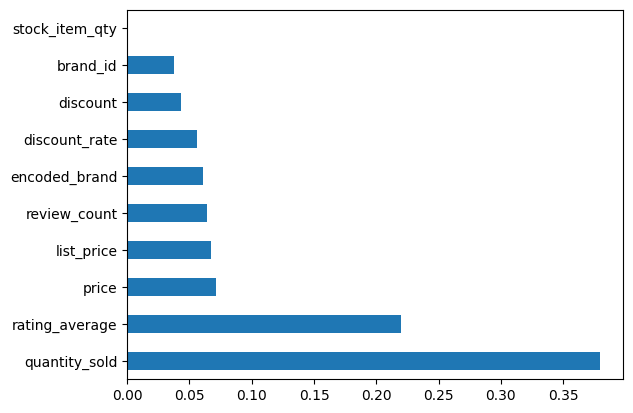

In [31]:
# 2. Feature Importance
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
X = clean_data[['price', 'list_price', 'discount', 'discount_rate', 'rating_average', 'review_count', 'quantity_sold', 'stock_item_qty', 'stock_item_max_sale_qty', 'brand_id', 'encoded_brand']] #independent columns
Y = clean_data['quantity_sold'] # target column 

model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)  # use inbuilt class feature_importances of tree based classifiers
# plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

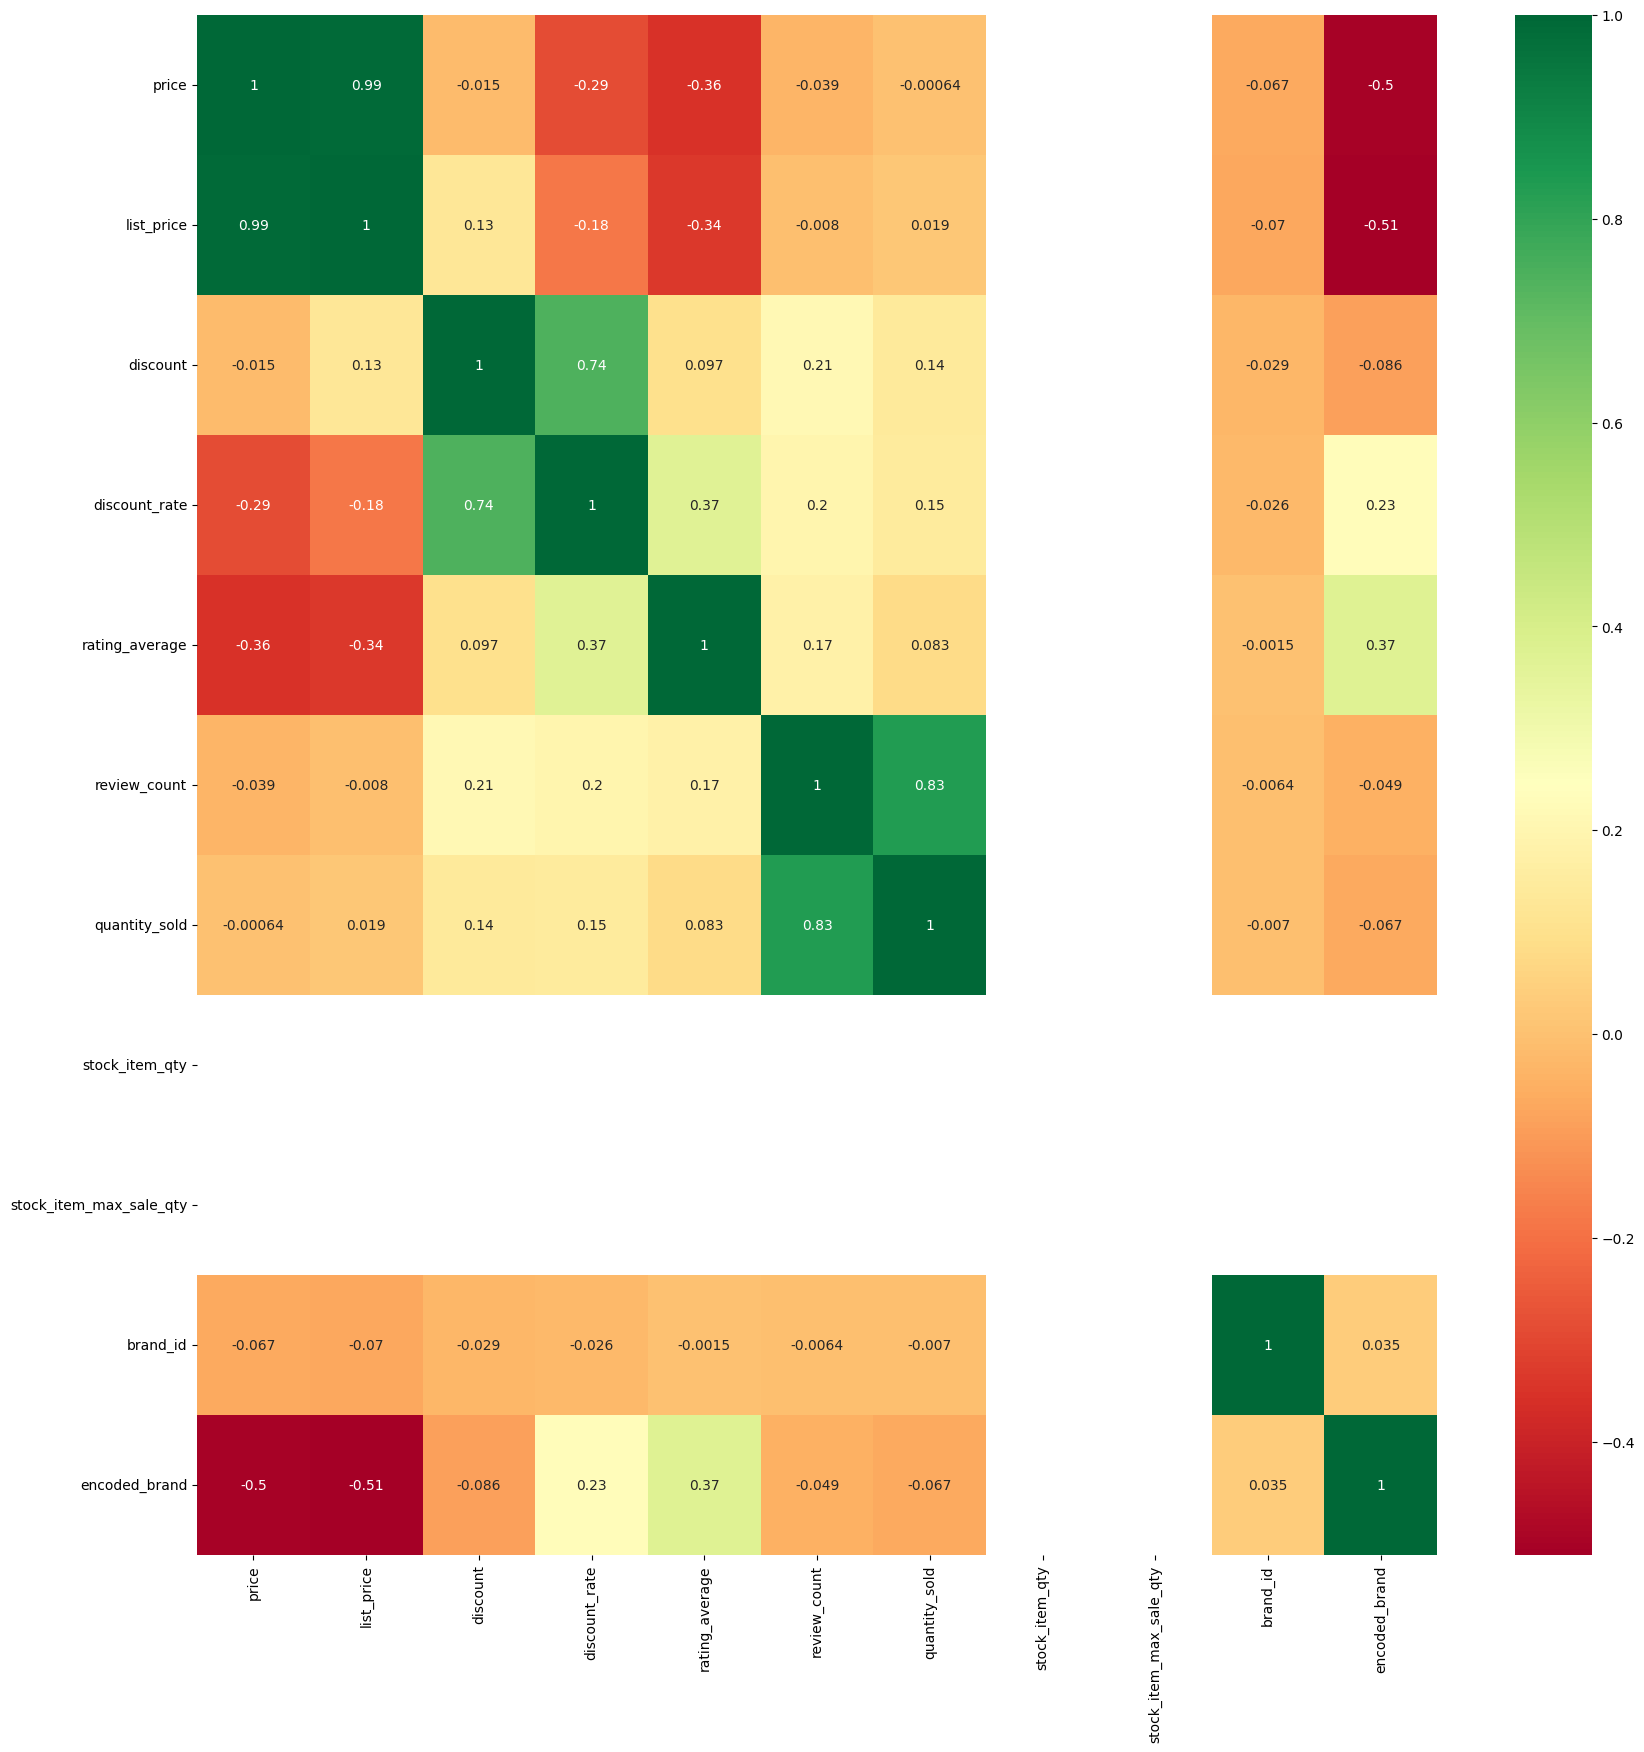

In [33]:
# 3. Correlation Matrix with Heatmap
import seaborn as sns
X = clean_data[['price', 'list_price', 'discount', 'discount_rate', 'rating_average', 'review_count', 'quantity_sold', 'stock_item_qty', 'stock_item_max_sale_qty', 'brand_id', 'encoded_brand']] #independent columns
Y = clean_data['quantity_sold'] # target column 
# get correlations of each features in dataset
corrmat = X.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20, 20))
# plot heat map
g = sns.heatmap(clean_data[top_corr_features].corr(), annot=True, cmap='RdYlGn')